# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

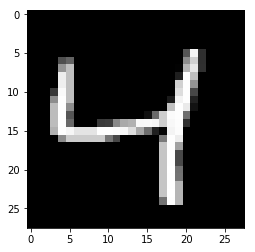

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

insize = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None,insize), name='inputs')
targets_ = tf.placeholder(tf.float32, (None,insize), name='targets')
                          
# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,insize)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_,logits = logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6872
Epoch: 1/20... Training loss: 0.6833
Epoch: 1/20... Training loss: 0.6781
Epoch: 1/20... Training loss: 0.6729
Epoch: 1/20... Training loss: 0.6658
Epoch: 1/20... Training loss: 0.6584
Epoch: 1/20... Training loss: 0.6495
Epoch: 1/20... Training loss: 0.6398
Epoch: 1/20... Training loss: 0.6272
Epoch: 1/20... Training loss: 0.6139
Epoch: 1/20... Training loss: 0.5994
Epoch: 1/20... Training loss: 0.5891
Epoch: 1/20... Training loss: 0.5723
Epoch: 1/20... Training loss: 0.5552
Epoch: 1/20... Training loss: 0.5373
Epoch: 1/20... Training loss: 0.5195
Epoch: 1/20... Training loss: 0.5061
Epoch: 1/20... Training loss: 0.4852
Epoch: 1/20... Training loss: 0.4689
Epoch: 1/20... Training loss: 0.4493
Epoch: 1/20... Training loss: 0.4314
Epoch: 1/20... Training loss: 0.4213
Epoch: 1/20... Training loss: 0.4109
Epoch: 1/20... Training loss: 0.3899
Epoch: 1/20... Training loss: 0.3839
E

Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1801
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1843
E

Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1442
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1455
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1437
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1444
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1461
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1470
E

Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1242
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1237
Epoch: 3/20... Training loss: 0.1245
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1257
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1258
Epoch: 3/20... Training loss: 0.1243
Epoch: 3/20... Training loss: 0.1222
Epoch: 3/20... Training loss: 0.1254
E

Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1182
E

Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1074
E

Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1086
E

Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1000
E

Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1032
E

Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0962
E

Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0962
E

Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0997
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0996
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0996
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0859
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0880
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

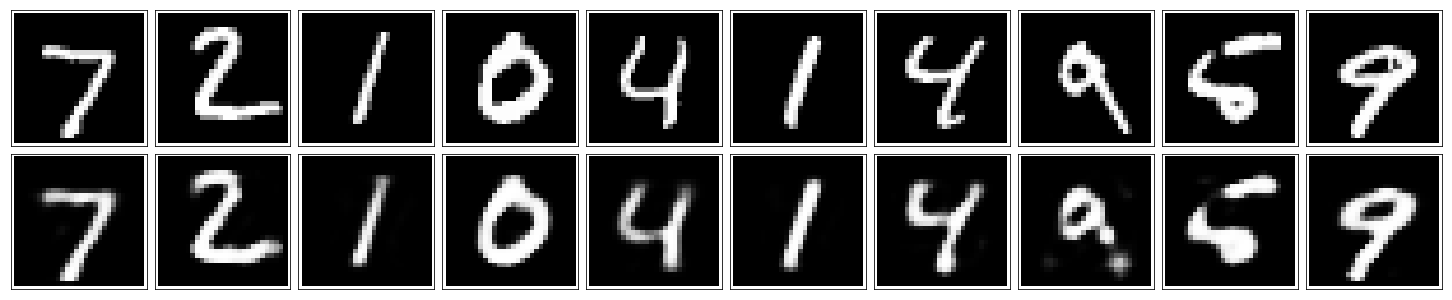

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.